In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/kagglecatsanddogs_5340.zip", 'r')
zip_ref.extractall("data")
zip_ref.close()

Mounted at /content/drive/


In [ ]:
import glob 
cat_files = glob.glob("/content/data/PetImages/Cat/*.jpg")
dog_files = glob.glob("/content/data/PetImages/Dog/*.jpg")
len(cat_files)
len(dog_files)

12500

In [ ]:
import numpy as np
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=300, replace=False)
dog_val = np.random.choice(dog_files, size=300, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=200, replace=False)
dog_test = np.random.choice(dog_files, size=200, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (300,) (200,)
Dog datasets: (1500,) (300,) (200,)


In [ ]:
train_set = np.append(cat_train,dog_train)
test_set  = np.append(cat_test,dog_test)
val_set   = np.append(cat_val,dog_val)

In [ ]:
print('datasets:', train_set.shape, test_set.shape, val_set.shape)

datasets: (3000,) (400,) (600,)


In [ ]:
import shutil
for f in cat_train:
  shutil.move(f, "/content/Train/Cat") 

In [ ]:
for f in dog_train:
  shutil.move(f, "/content/Train/Dog") 

In [ ]:
for f in dog_val:
  shutil.move(f, "/content/Validation/Dog") 

In [ ]:
for f in cat_val:
  shutil.move(f, "/content/Validation/Cat") 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    "/content/Train/",
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    "/content/Validation/",
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.


In [ ]:
import os
!rm -rf "/content/Train/.ipynb_checkpoints"
!rm -rf "/content/Validation/.ipynb_checkpoints"

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from keras import optimizers
model.compile(
    loss='binary_crossentropy',
    optimizer = optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 19.9400 - loss: 0.6701 - acc: 0.5848

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


100/100 [==============================] - 127s 1s/step - batch: 49.5000 - size: 19.9400 - loss: 0.6702 - acc: 0.5848 - val_loss: 0.6494 - val_acc: 0.6340
Epoch 2/15
100/100 [==============================] - 128s 1s/step - batch: 49.5000 - size: 19.9400 - loss: 0.6326 - acc: 0.6414 - val_loss: 0.6193 - val_acc: 0.6650
Epoch 3/15
100/100 [==============================] - 133s 1s/step - batch: 49.5000 - size: 20.0000 - loss: 0.6099 - acc: 0.6585 - val_loss: 0.6162 - val_acc: 0.6650
Epoch 4/15
100/100 [==============================] - 128s 1s/step - batch: 49.5000 - size: 19.9400 - loss: 0.5718 - acc: 0.6931 - val_loss: 0.6029 - val_acc: 0.6720
Epoch 5/15
100/100 [==============================] - 126s 1s/step - batch: 49.5000 - size: 20.0000 - loss: 0.5710 - acc: 0.7015 - val_loss: 0.5873 - val_acc: 0.6940
Epoch 6/15
100/100 [==============================] - 128s 1s/step - batch: 49.5000 - size: 19.9400 - loss: 0.5405 - acc: 0.7262 - val_loss: 0.5564 - val_acc: 0.7020
Epoch 7/15
100/

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
path = Path('/content/Train/Cat/').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
import os
try: 
    os.remove("/content/Train/Cat/666.jpg")
    print("removed")
except:
  print("can't remove") 
  pass

can't remove


In [ ]:
model.save('cats_and_dogs1.h5')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


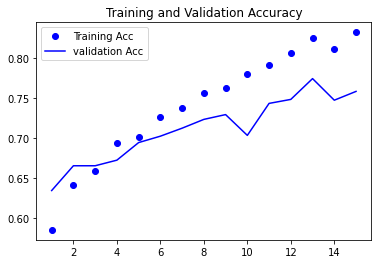

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label="validation Acc")
plt.title("Training and Validation Accuracy")
plt.legend()

In [ ]:
# Seems like overfitting, we stop at 15 epochs
from tensorflow import keras
model = keras.models.load_model('/content/cats_and_dogs1.h5')

In [ ]:
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

conv2d_1 (3, 3, 3, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 128)
conv2d_4 (3, 3, 128, 128)


(1, 150, 150, 3)


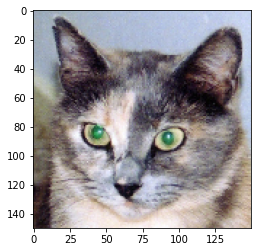

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


(1, 148, 148, 32)


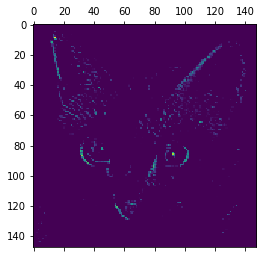

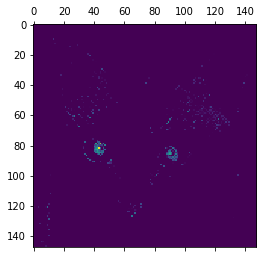

In [ ]:
# Visualize Activations
img_path = '/content/data/PetImages/Cat/1700.jpg'
from keras.preprocessing import image
from PIL import Image
import numpy as np
img = keras.utils.load_img(img_path,target_size=(150,150))
img_tensor = keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor/=255
print(img_tensor.shape)
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = keras.models.Model(inputs=model.input,outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0,:,:,4],cmap='viridis')
plt.matshow(first_layer_activation[0,:,:,7],cmap='viridis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


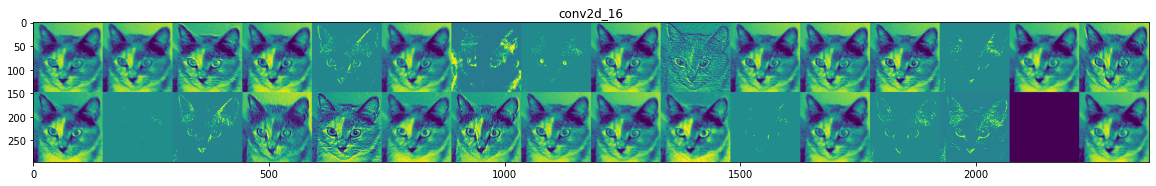

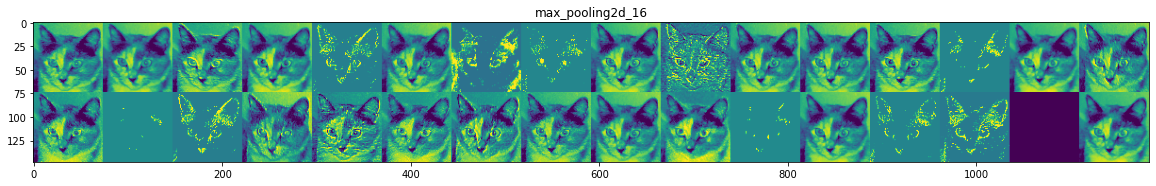

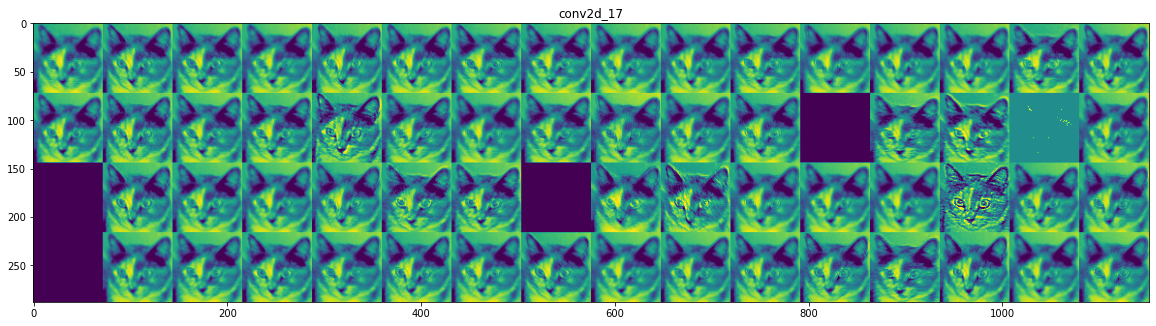

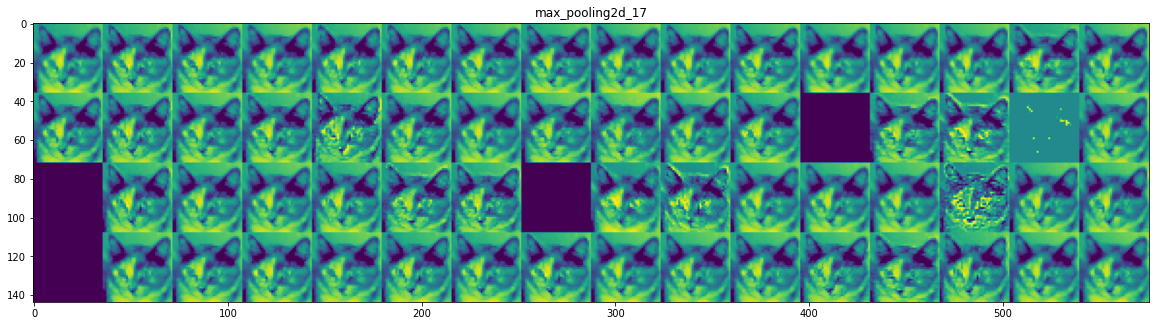

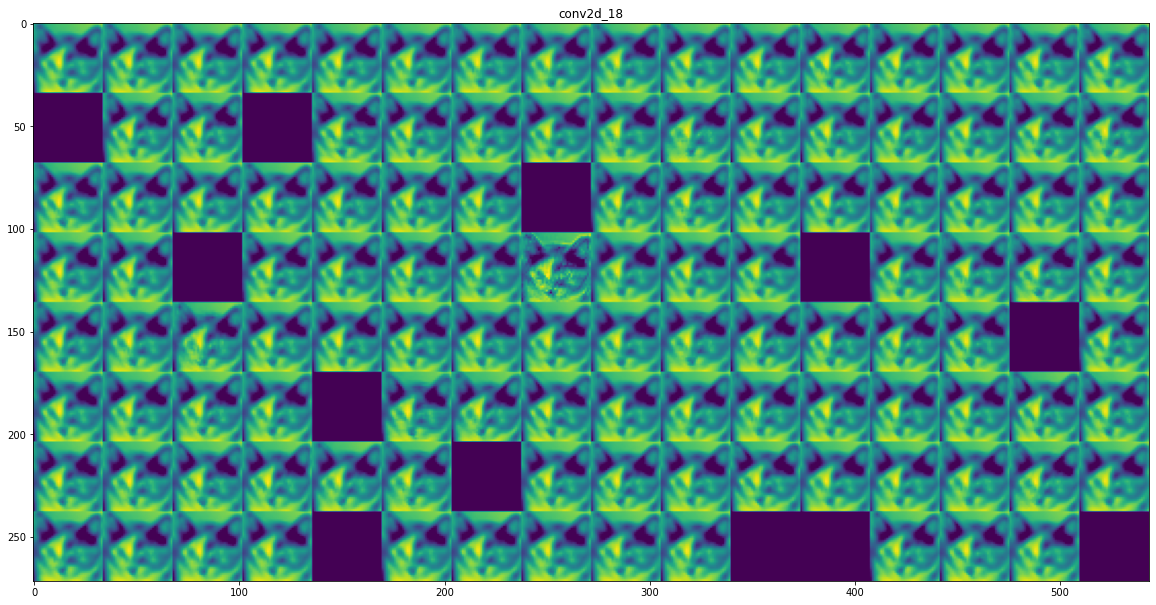

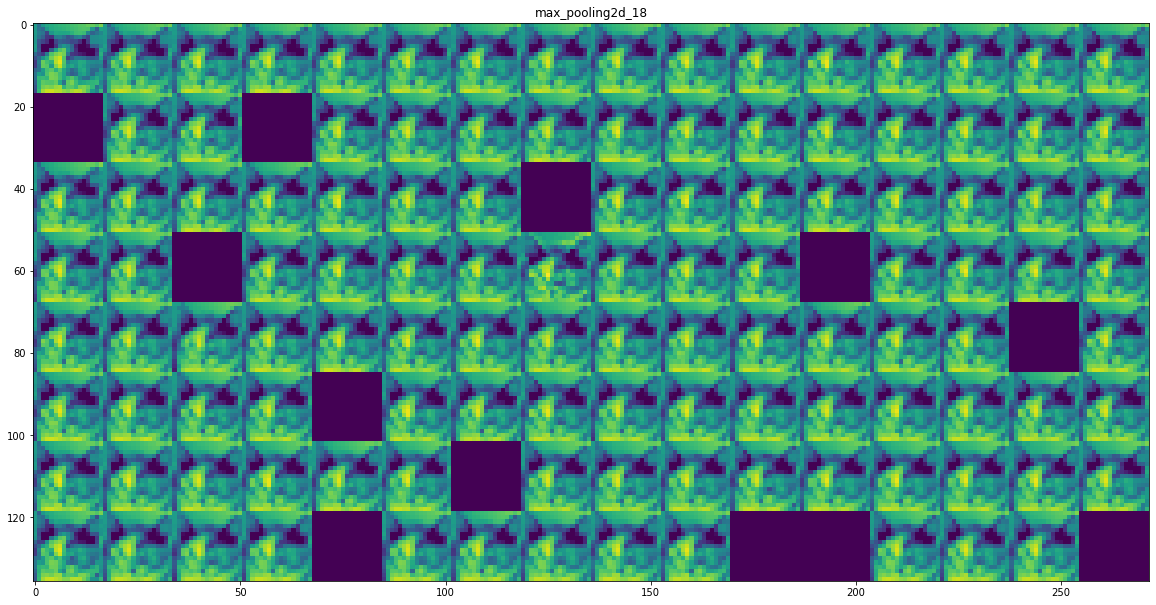

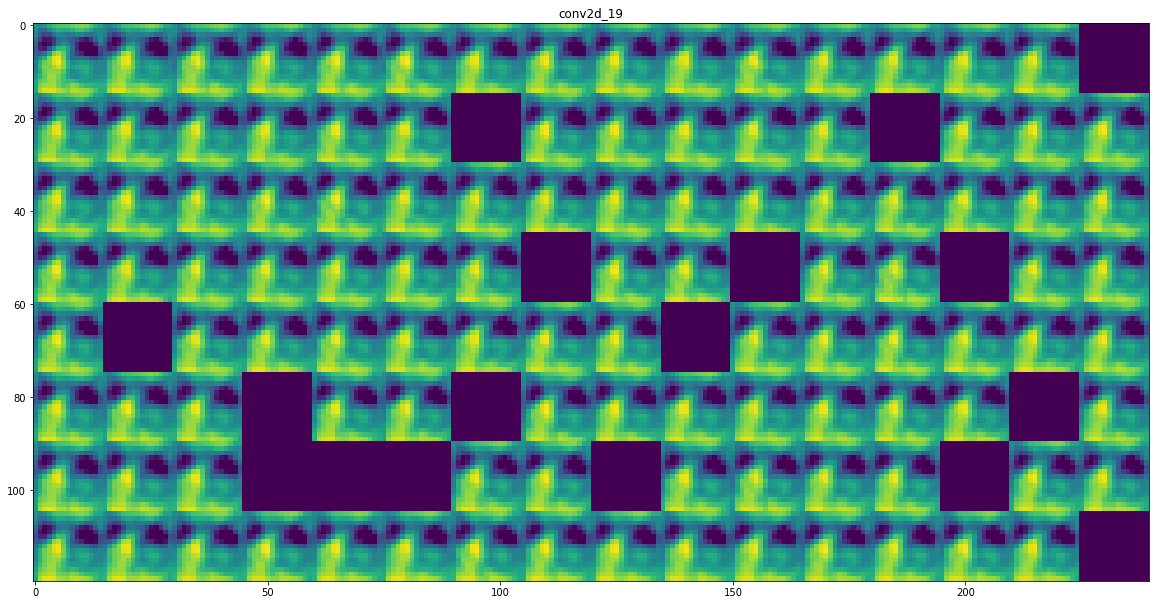

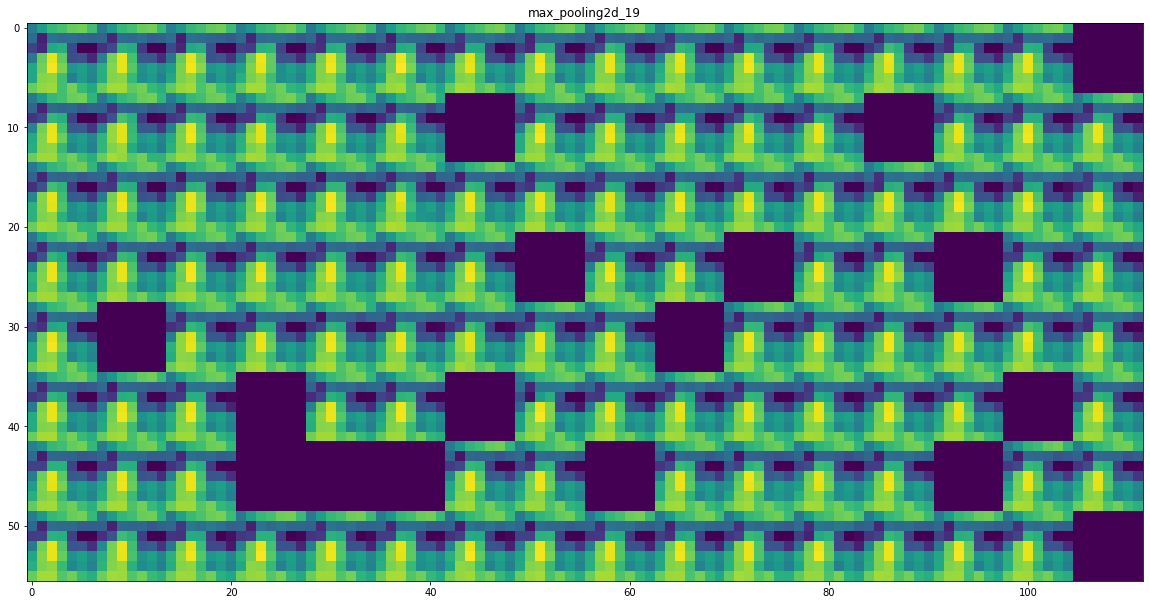

In [ ]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:,:,col*images_per_row+row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image,0,255).astype('uint8')
      display_grid[col*size: (col+1)*size,row*size:(row+1)*size]=channel_image
  plt.figure(figsize=(20,20))
  plt.title(layer_name)
  plt.imshow(display_grid)

In [ ]:
from keras.applications import VGG16
from keras import backend as K
#model1 = VGG16(weights='imagenet',include_top=False)
layer_name='conv2d_4'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()




layer_name = 'conv2d_4'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, model.input)[0]

In [ ]:
import numpy as np
iterate = K.function([model.input],[loss,grads])
loss_value, grads_value = iterate([np.zeros((1,150,150,3))])

In [ ]:
input_img_data = np.random.random((1,150,150,3)) * 20 +128
step = 1
for i in range(49):
  loss_value, grads_value =iterate([input_img_data])
  input_img_data+=grads_value*step

In [ ]:
def deprocess_image(x):
  x-=x.mean()
  x/=(x.std()+1e-5)
  x*=0.1
  x+=9.5
  x = np.clip(x,0,1)
  x*=255
  x = np.clip(x,0,255).astype('uint8')
  return x

In [ ]:
def generate_pattern(layer_name, filter_index,size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:,:,:,filter_index])
  grad = K.gradients(loss,model.input)[0]
  grad/= (K.sqrt(K.mean(K.square(grads)))+1e-5)
  iterate = K.function([model.input],[loss,grads])
  input_img_data = np.random.random((1,size,size,3)) * 20 +128
  step = 1
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
  img = input_img_data[0]
  return deprocess_image(img)

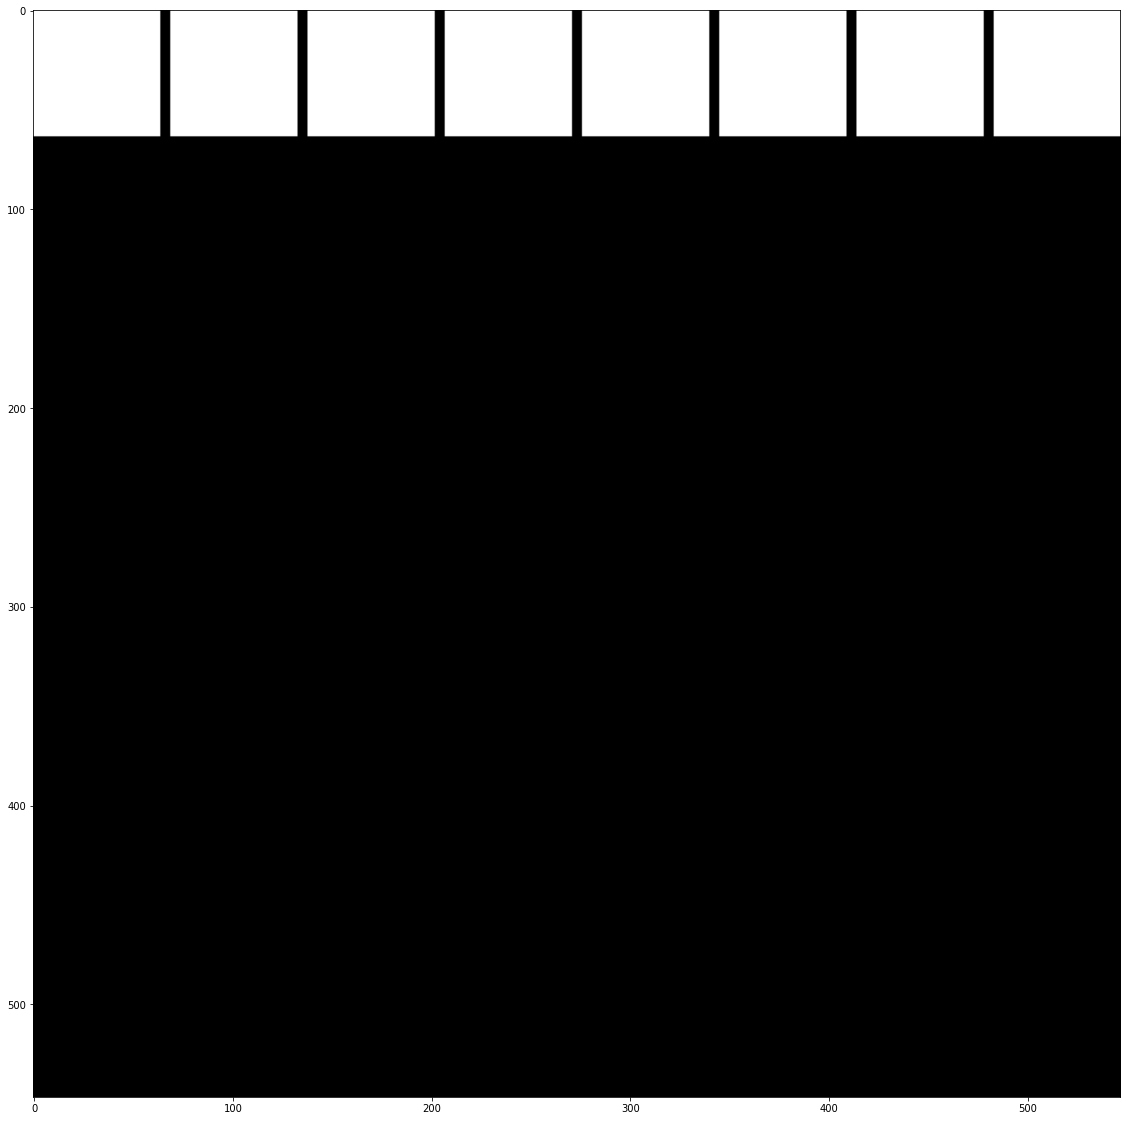

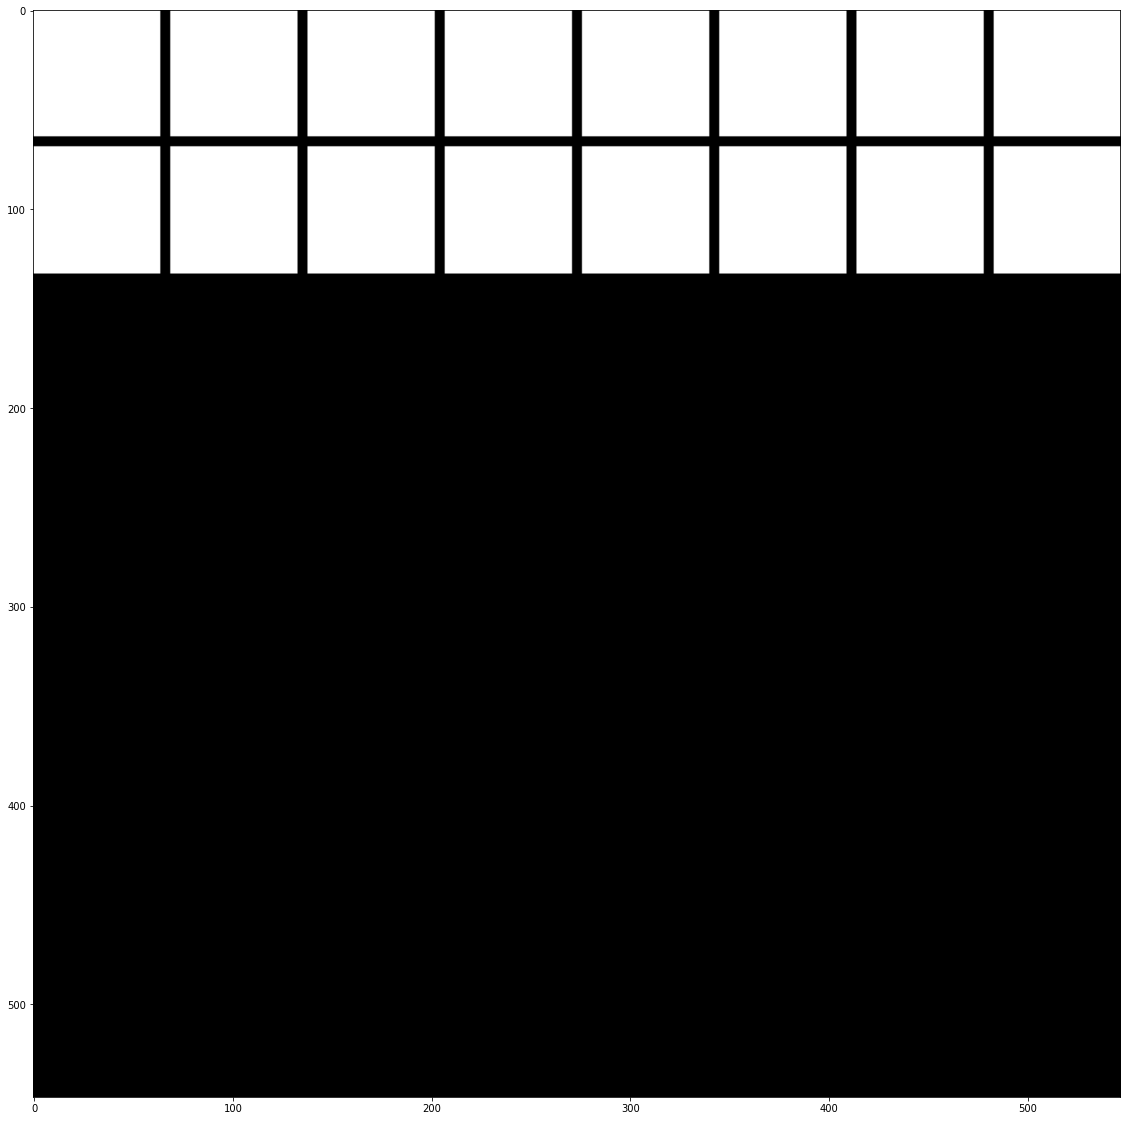

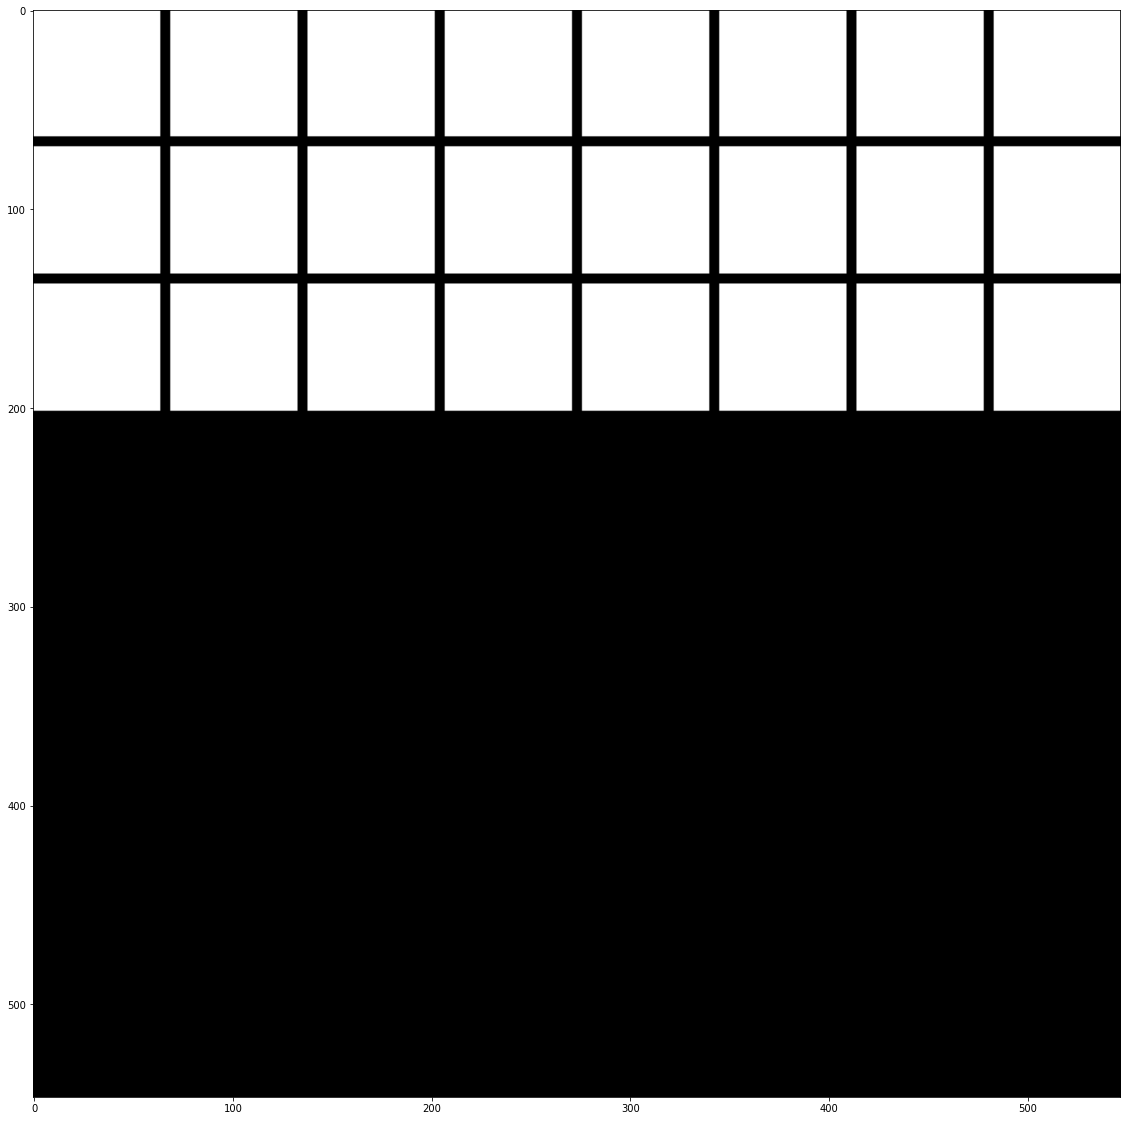

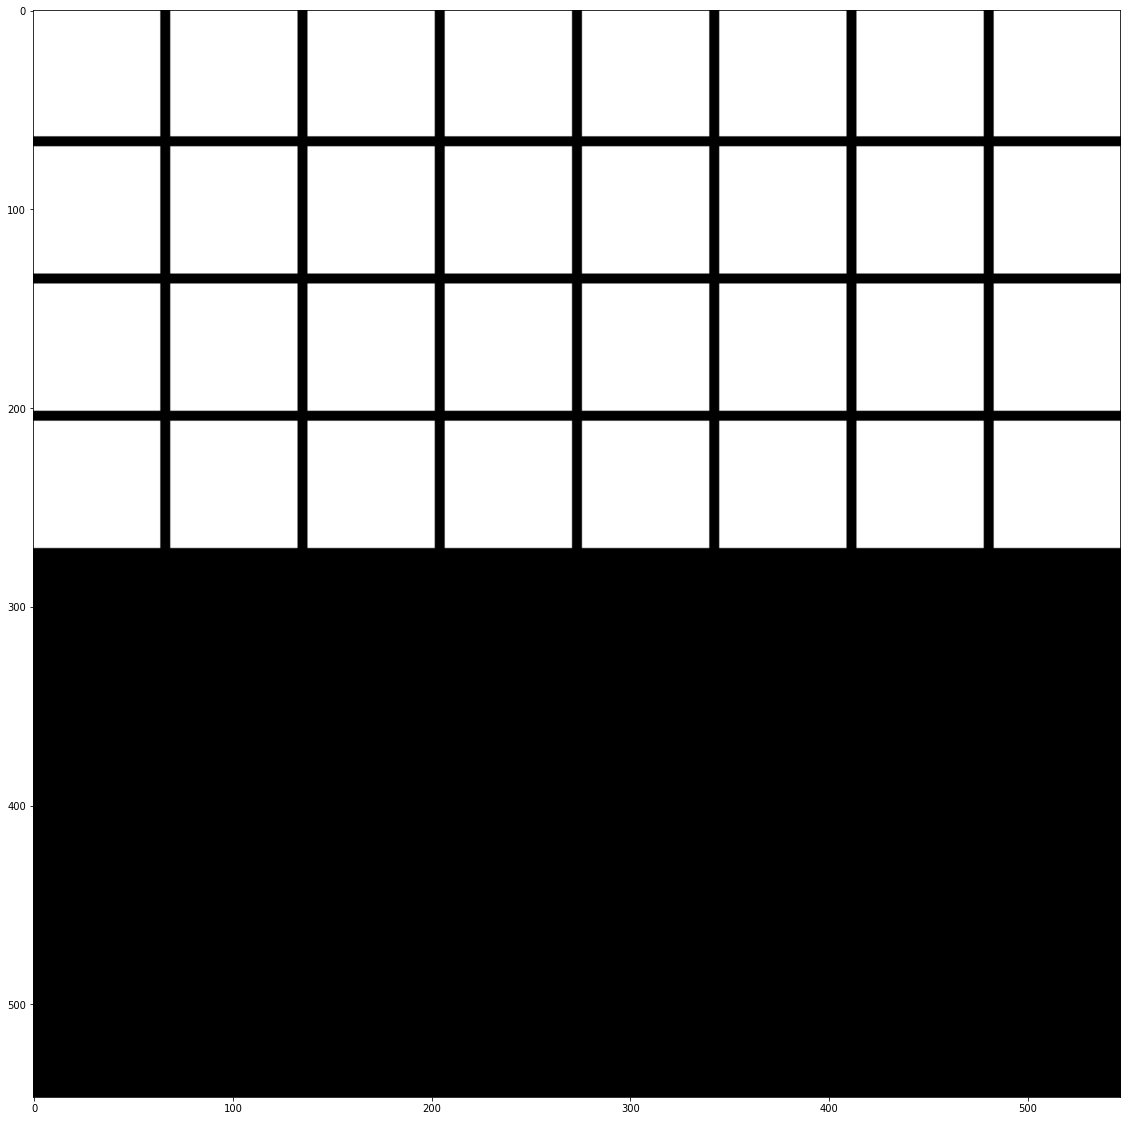

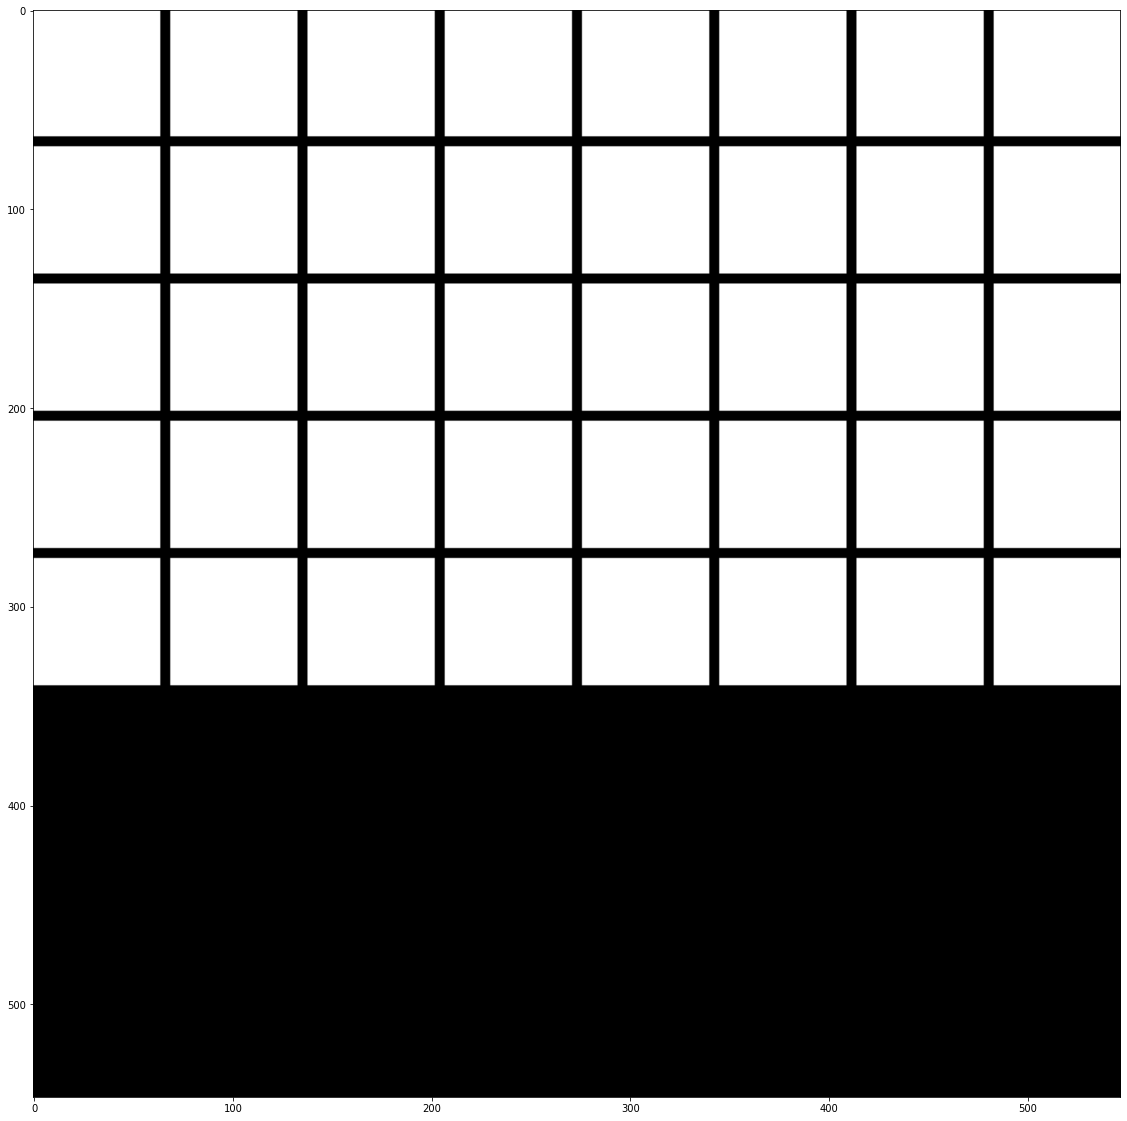

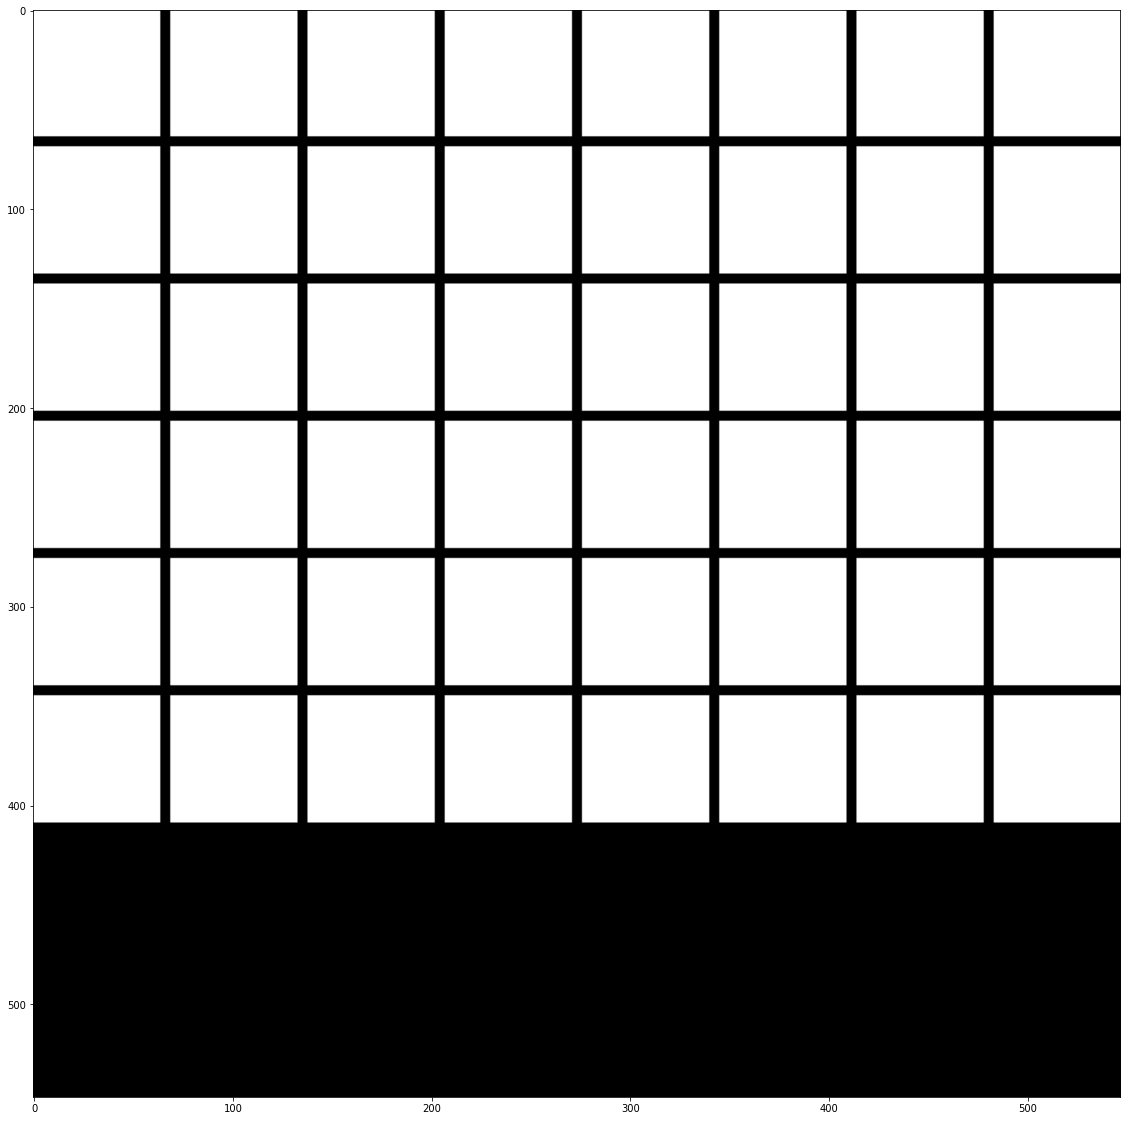

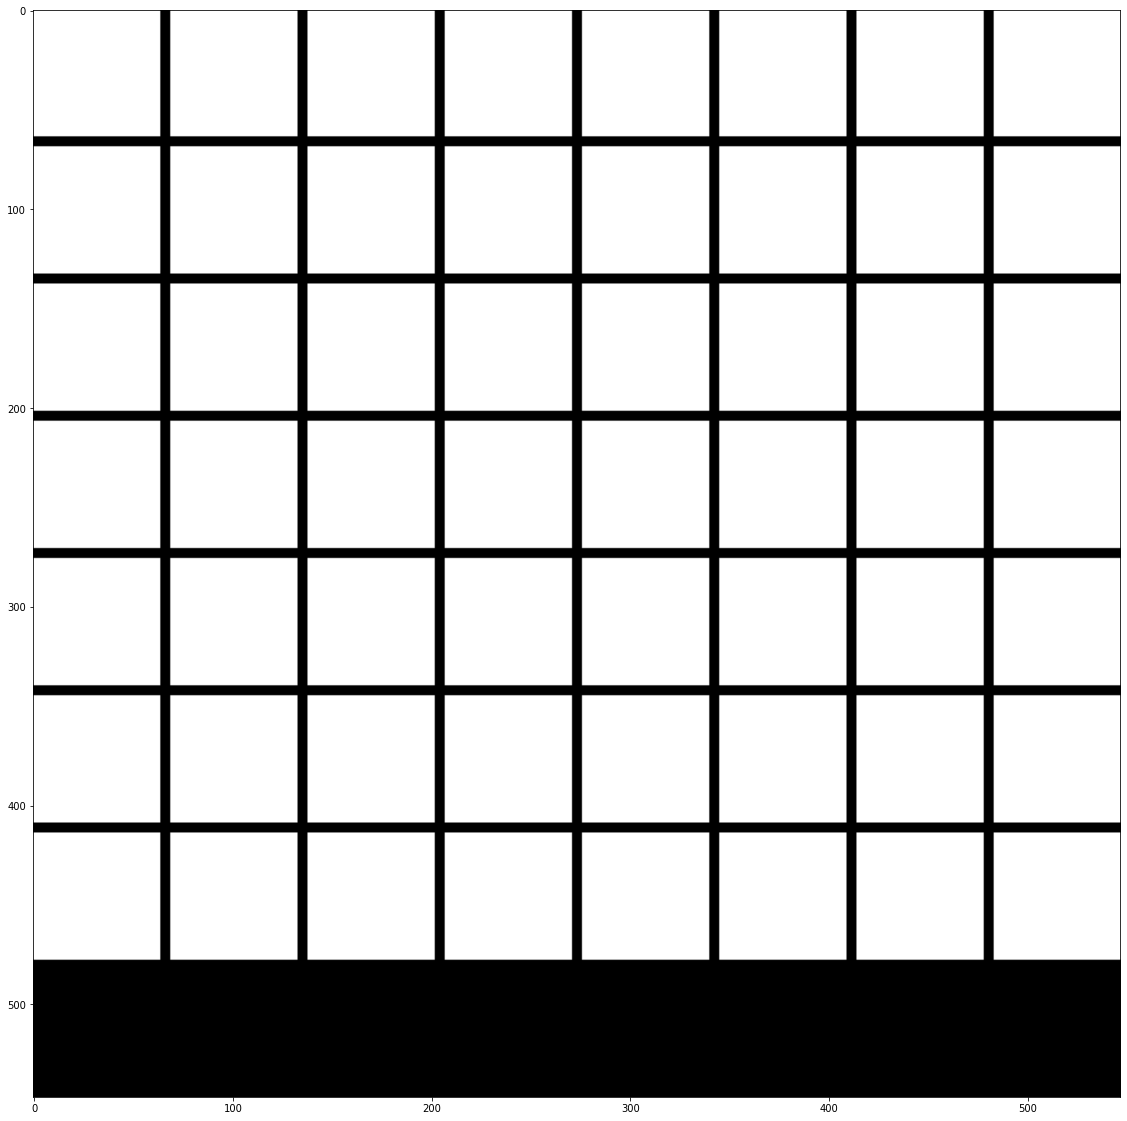

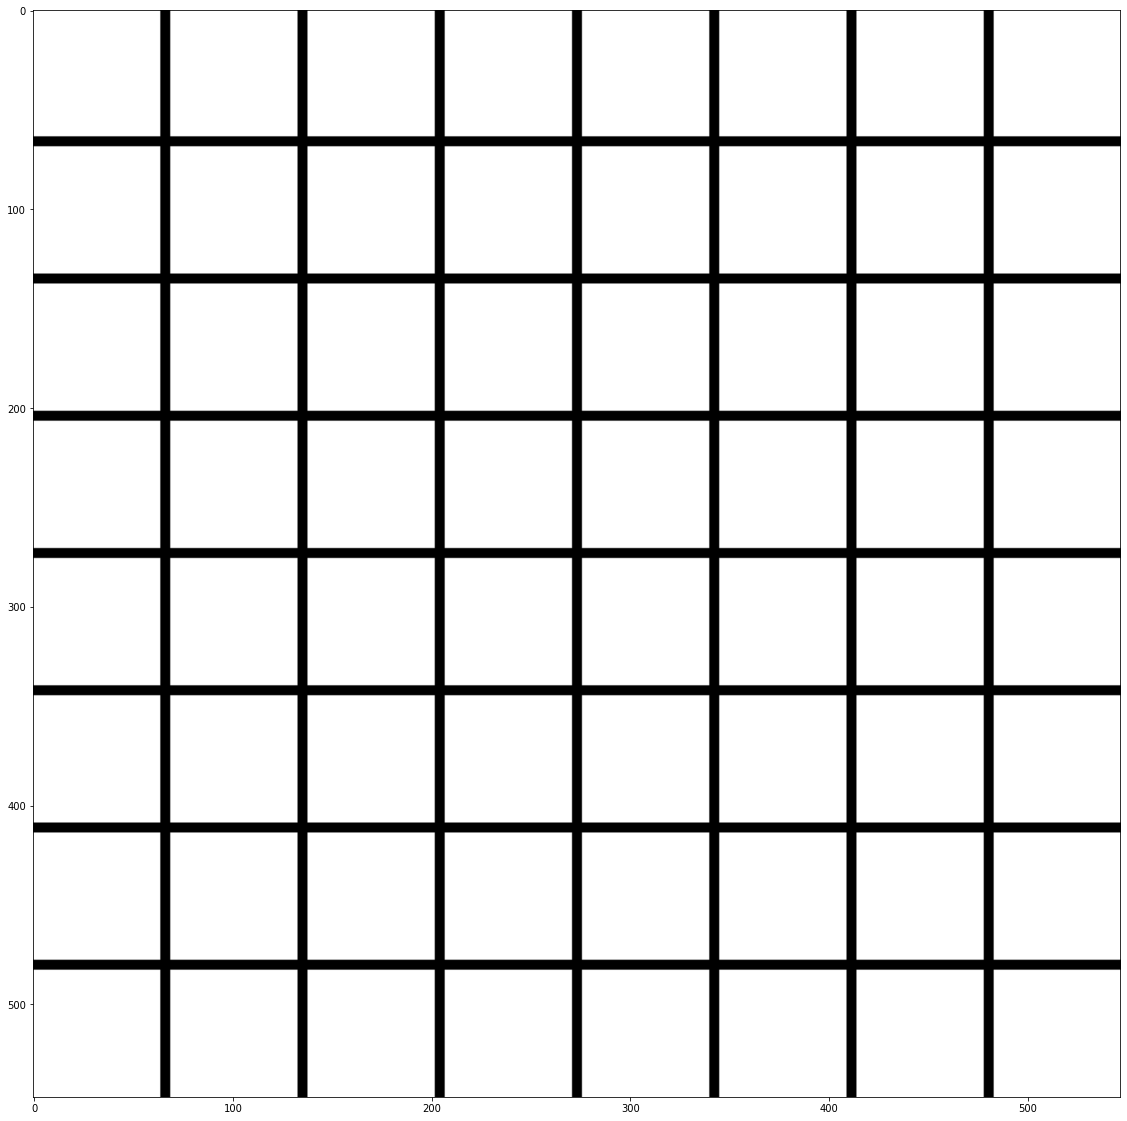

In [ ]:
import matplotlib.pyplot as plt
layer_name = 'conv2d_4'
size = 64
margin = 5
results = np.zeros((8* size+7 * margin, 8*size+7*margin,3))
for i in range (8):
  for j in range(8):
    filter_img = generate_pattern(layer_name,i+(j*8),size = size)
    horizontal_start = i *size + i* margin
    horizontal_end = horizontal_start +size
    vertical_start = j*size+j*margin
    vertical_end = vertical_start +size
    results[horizontal_start:horizontal_end,vertical_start:vertical_end,:] = filter_img
  plt.figure(figsize=(20,20))
  plt.imshow(results)

In [ ]:
model1 = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
model1.trainable = False
modelFrozen = keras.models.Sequential()
modelFrozen.add(model1)
modelFrozen.add(keras.layers.Flatten())
modelFrozen.add(keras.layers.Dense(512,activation='relu'))
modelFrozen.add(keras.layers.Dense(1,activation='sigmoid'))
modelFrozen.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])
history = modelFrozen.fit(train_generator,steps_per_epoch=50,epochs=15,validation_data=validation_generator,validation_steps=50)

Epoch 1/15
50/50 [==============================] - 337s 7s/step - batch: 24.5000 - size: 20.0000 - loss: 0.4798 - acc: 0.7760 - val_loss: 0.2912 - val_acc: 0.8840
Epoch 2/15
50/50 [==============================] - 328s 7s/step - batch: 24.5000 - size: 20.0000 - loss: 0.3783 - acc: 0.8260 - val_loss: 0.2752 - val_acc: 0.8780
Epoch 3/15
50/50 [==============================] - 324s 7s/step - batch: 24.5000 - size: 20.0000 - loss: 0.3246 - acc: 0.8520 - val_loss: 0.2413 - val_acc: 0.8980
Epoch 4/15
50/50 [==============================] - 328s 7s/step - batch: 24.5000 - size: 20.0000 - loss: 0.2557 - acc: 0.8850 - val_loss: 0.2489 - val_acc: 0.8890
Epoch 5/15
50/50 [==============================] - 333s 7s/step - batch: 24.5000 - size: 20.0000 - loss: 0.2370 - acc: 0.8960 - val_loss: 0.2364 - val_acc: 0.8920
Epoch 6/15
50/50 [==============================] - 333s 7s/step - batch: 24.5000 - size: 20.0000 - loss: 0.2480 - acc: 0.8880 - val_loss: 0.2591 - val_acc: 0.8890
Epoch 7/15
50/50

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


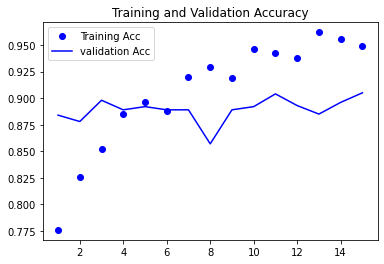

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label="validation Acc")
plt.title("Training and Validation Accuracy")
plt.legend()

In [95]:
model1 = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))
model1.trainable = True
modelUnFrozen = keras.models.Sequential()
modelUnFrozen.add(model1)
modelUnFrozen.add(keras.layers.Flatten())
modelUnFrozen.add(keras.layers.Dense(512,activation='relu'))
modelUnFrozen.add(keras.layers.Dense(1,activation='sigmoid'))
modelUnFrozen.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])
history = modelUnFrozen.fit(train_generator,steps_per_epoch=50,epochs=15,validation_data=validation_generator,validation_steps=50)

Epoch 1/15
50/50 [==============================] - ETA: 0s - batch: 24.5000 - size: 20.0000 - loss: 0.7723 - acc: 0.5070 

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50/50 [==============================] - 829s 17s/step - batch: 24.5000 - size: 20.0000 - loss: 0.7723 - acc: 0.5070 - val_loss: 0.6721 - val_acc: 0.6470
Epoch 2/15
50/50 [==============================] - 808s 16s/step - batch: 24.5000 - size: 20.0000 - loss: 0.6610 - acc: 0.6230 - val_loss: 0.6583 - val_acc: 0.6620
Epoch 3/15
50/50 [==============================] - 791s 16s/step - batch: 24.5000 - size: 20.0000 - loss: 0.5670 - acc: 0.7300 - val_loss: 0.3564 - val_acc: 0.8250
Epoch 4/15
50/50 [==============================] - 785s 16s/step - batch: 24.5000 - size: 20.0000 - loss: 0.3494 - acc: 0.8650 - val_loss: 0.3457 - val_acc: 0.8510
Epoch 5/15
50/50 [==============================] - 808s 16s/step - batch: 24.5000 - size: 20.0000 - loss: 0.3529 - acc: 0.8470 - val_loss: 0.3006 - val_acc: 0.8730
Epoch 6/15
50/50 [==============================] - 786s 16s/step - batch: 24.5000 - size: 20.0000 - loss: 0.3679 - acc: 0.8470 - val_loss: 0.2305 - val_acc: 0.9160
Epoch 7/15
50/50 [===

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


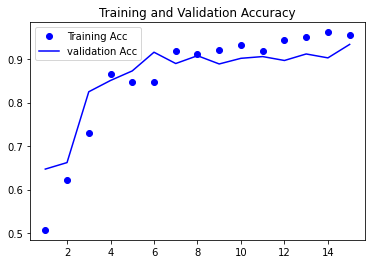

In [96]:
import matplotlib.pyplot as plt
print(history.history.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label="validation Acc")
plt.title("Training and Validation Accuracy")
plt.legend()

In [97]:
train_datagen = ImageDataGenerator(rescale=1/255,width_shift_range=0.4,rotation_range=20,height_shift_range=0.4,shear_range=0.4,zoom_range=0.3,horizontal_flip=True)
modelUnFrozen.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])
history = modelUnFrozen.fit(train_datagen,steps_per_epoch=50,epochs=15,validation_data=validation_generator,validation_steps=50)